<a href="https://colab.research.google.com/github/ananthakrishnanpta/KNN-Naive-Bayes-project/blob/main/Knn_Nb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Naive Bayes is a classification algorithm which is based on Bayes theorem with strong and naïve independence assumptions. It simplifies learning by assuming that features are independent of given class.This paper surveys about naïve Bayes algorithm, which describes its concept, hidden naïve Bayes, text classification, traditional naïve Bayes and machine learning. Also represents augmented naïve Bayes by examples. And at the end some applications of naïve Bayes and its advantages and disadvantages has discussed for a better understanding of the algorithm.
# Biomechanical Features of Orthopedic Patients

In this project we are provided with multiple instances of orthopedic parameters and we are also provided with their classification as **Normal** or **Abnormal**

![img](https://user-images.githubusercontent.com/67789350/105318173-2d45f880-5be9-11eb-9acf-58bf5d130fbc.png)

To get started , first download the csv file from this [link](https://drive.google.com/file/d/1uPHmxoTvoemq8X54Y5GehYy13_J404Zn/view?usp=sharing)

We have to implement K Nearest Neighbour, the algorithm is used to classify points according to class of their K nearest neighbour point

And also on the the same dataset Implement a Gaussian Naive Bayes based classifier

### Now that you have the dataset , let us get started !



In [34]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)


# Section I : Accessing the Data

- Make a pandas DataFrame from the CSV
- How many variables does the dataset contain?
- What is the data about?
- What are we trying to predict here?

In [36]:
# I. Loading the file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/techis-ds-wiki/DS/Step 2-2 Classification Algos/04_Knn_Nb_Project/ortho_knnnb.csv")

# II. Number of variables in the dataset:

print("The given dataset has {} variables. \n".format(len(df.columns)))

# III. What is the data about?
print("The given dataset gives an insight into different orthopedic parameters of human body.\n")

# IV. What are we trying to predict here?
print("We are trying to predict if the given features are normal or abnormal.")


The given dataset has 7 variables. 

The given dataset gives an insight into different orthopedic parameters of human body.

We are trying to predict if the given features are normal or abnormal.


# Section II : Exploratory Data Analysis

- Perform some descriptive statistics and make a note of your findings 
- Plot appropriate graphs to understand the relation between the variables.
- Point out any observations and comment on the strength of the relationships if any.

In [37]:
print("Head of data is:- ",df.head())
print("Summary of dataset:- ",df.describe())
print("Datatypes of dataset variables:- ",df.dtypes)

print("Shape of dataframe:- ",df.shape)

Head of data is:-     pelvic_incidence  pelvic_tilt numeric  ...  degree_spondylolisthesis     class
0         63.027817            22.552586  ...                 -0.254400  Abnormal
1         39.056951            10.060991  ...                  4.564259  Abnormal
2         68.832021            22.218482  ...                 -3.530317  Abnormal
3         69.297008            24.652878  ...                 11.211523  Abnormal
4         49.712859             9.652075  ...                  7.918501  Abnormal

[5 rows x 7 columns]
Summary of dataset:-         pelvic_incidence  ...  degree_spondylolisthesis
count        310.000000  ...                310.000000
mean          60.496653  ...                 26.296694
std           17.236520  ...                 37.559027
min           26.147921  ...                -11.058179
25%           46.430294  ...                  1.603727
50%           58.691038  ...                 11.767934
75%           72.877696  ...                 41.287352
max  

In [38]:
#Searching for null values

df.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

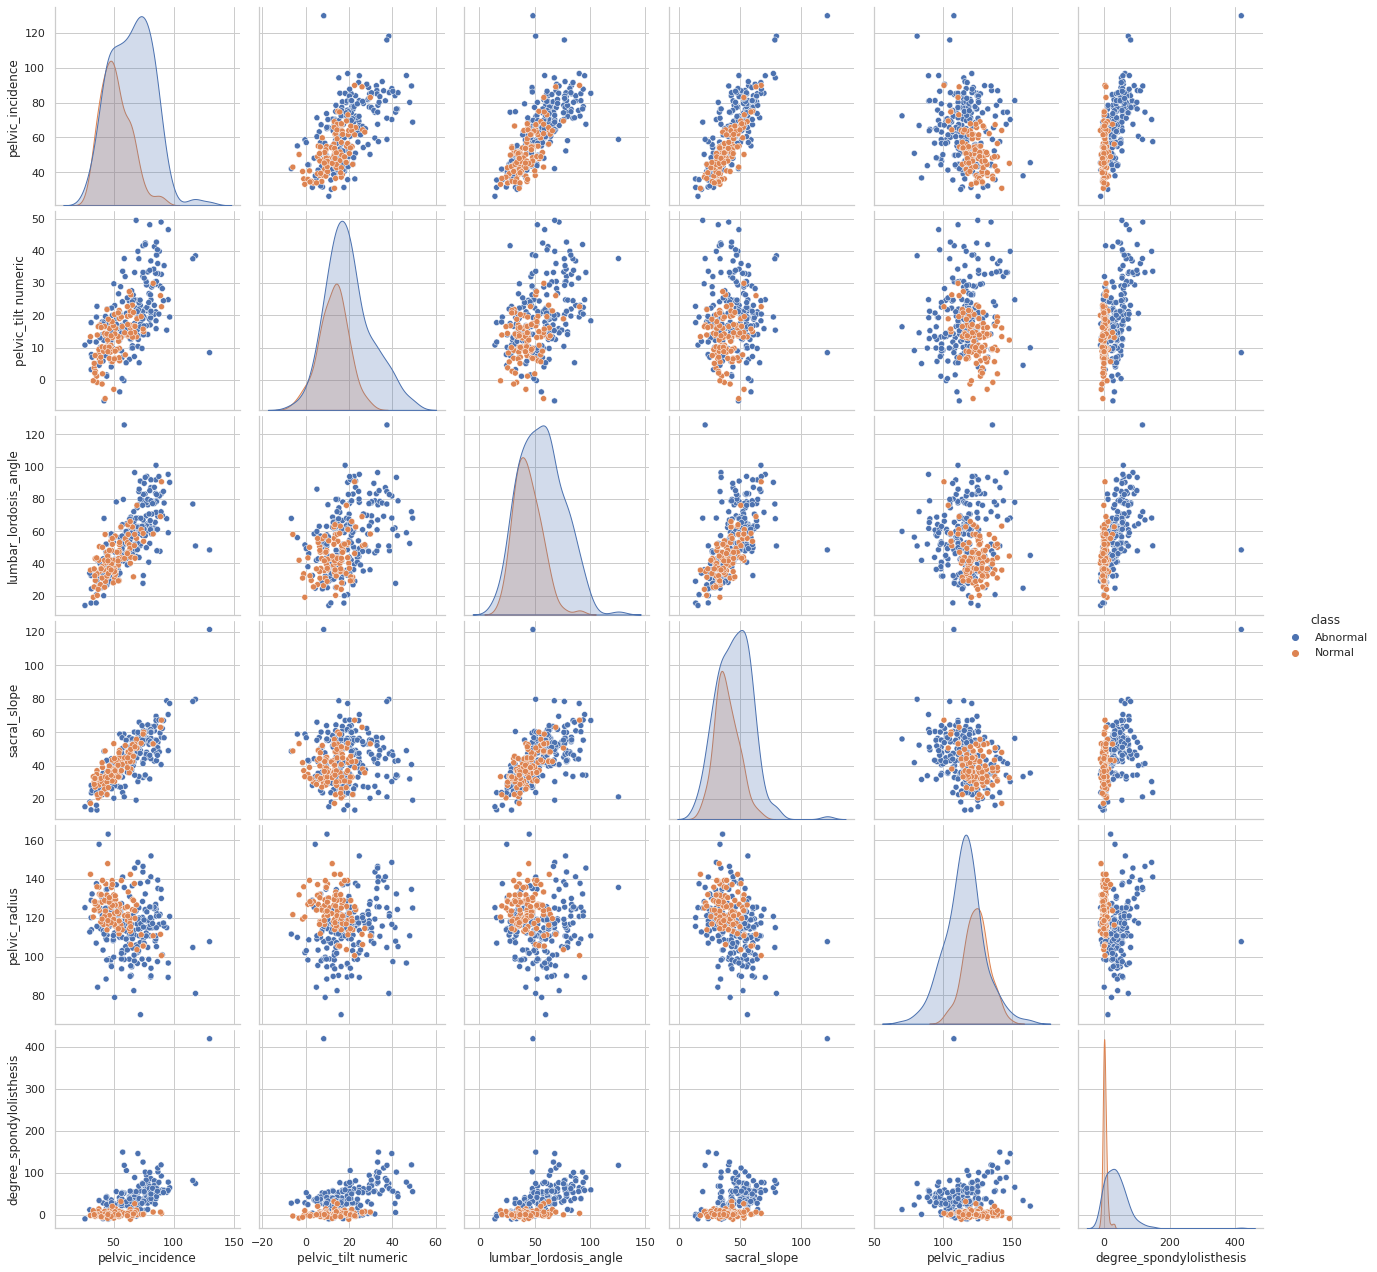

In [39]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="class", size=3);
plt.show()

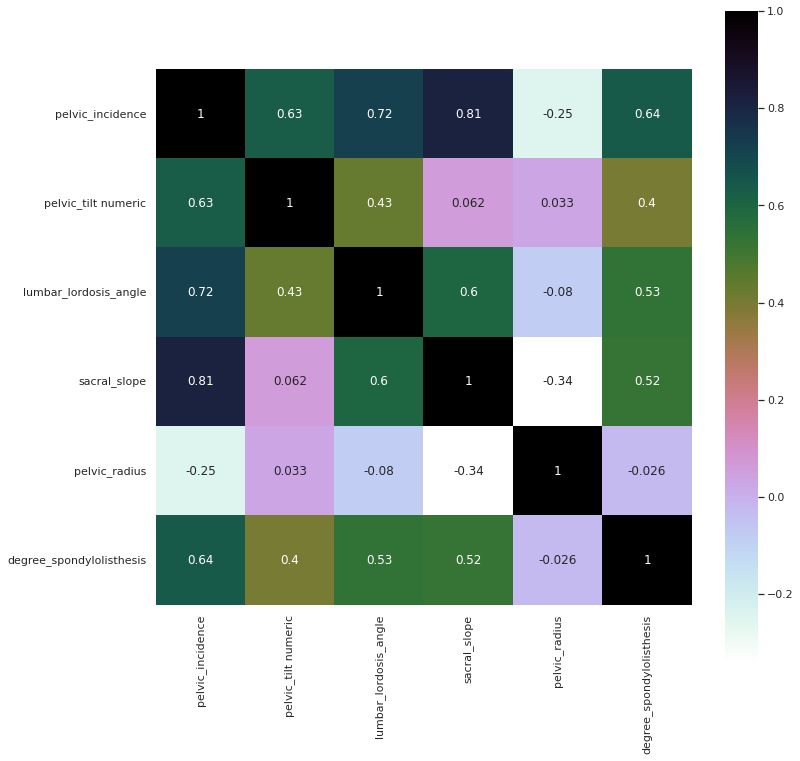

In [40]:
#checking for correlation

data_corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True)
plt.show()

#Section III : Prepare data for Training!

- Make a new column `symptom_class` with the abnormal rows as 1 and the normal rows as 0, drop the `class` column
- Split the entire dataset into independent features and symptoms as the response variable
- Normalize the variables.


In [41]:
class_val = df.columns[df.dtypes == 'object']
df_new=pd.get_dummies(df,columns=class_val)
df_new.rename(columns={'class_Abnormal':'symptom_class'},inplace = True)
df_new.drop('class_Normal',axis= 1, inplace = True)


In [42]:
df_new

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [43]:
#Splitting the dataset into independant and dependant variables:

x = df_new.drop('symptom_class',axis = 1)
y = df_new['symptom_class']



In [44]:
df_new['symptom_class'].value_counts()

1    210
0    100
Name: symptom_class, dtype: int64

In [45]:
# The class is not balanced.
# Let's use SMOTE to balance the data

from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x,y)
print(x_sm.shape)
print(y_sm.shape)
print(y_sm.value_counts())


(420, 6)
(420,)
1    210
0    210
Name: symptom_class, dtype: int64


In [46]:
#Now the data is balanced
x = x_sm
y = y_sm

#Section IV : Training with KNN

- Use `train_test_split` from `sklearn` and split the parameters and classes into train and test sets 
- Starting with **three** nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.
- Try with increasing the **k** value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of **k**.
- Evaluate your final model using appropriate metrics for classification and comment on them.

In [47]:
# Splitting into train and test
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)
print("Dimension of x_train is: ",x_train.shape)
print("Dimension of y_train is: ",y_train.shape)
print("Dimension of x_test is: ",x_test.shape)
print("Dimension of y_test is: ",y_test.shape)


Dimension of x_train is:  (336, 6)
Dimension of y_train is:  (336,)
Dimension of x_test is:  (84, 6)
Dimension of y_test is:  (84,)


In [48]:
# Normalizing the variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [49]:
#Using KNN Classifier for model building , K = 3

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)

# Predict Symptom_class truth value for test data
pred = KNN.predict(x_test)
pred

#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

#####################################################################################################################-------------------

#Using KNN Classifier for model building , K = 4

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

# Predict Symptom_class truth value for test data
pred = KNN.predict(x_test)
pred

#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=4 is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

#####################################################################################################################-------------------

#Using KNN Classifier for model building , K = 5

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)

# Predict Symptom_class truth value for test data
pred = KNN.predict(x_test)
pred

#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=5 is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

#####################################################################################################################-------------------

#Using KNN Classifier for model building , K = 6

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_train, y_train)

# Predict Symptom_class truth value for test data
pred = KNN.predict(x_test)
pred

#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=6 is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

#####################################################################################################################-------------------

#Using KNN Classifier for model building , K = 7

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train, y_train)

# Predict Symptom_class truth value for test data
pred = KNN.predict(x_test)
pred

#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=7 is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

#####################################################################################################################-------------------

#Using KNN Classifier for model building , K = 8

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=8)
KNN.fit(x_train, y_train)

# Predict Symptom_class truth value for test data
pred = KNN.predict(x_test)
pred

#validation of built model
from sklearn.metrics import accuracy_score,classification_report

print('The accuracy of the KNN with K=8 is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

The accuracy of the KNN with K=3 is 85.71%
The accuracy of the KNN with K=4 is 85.71%
The accuracy of the KNN with K=5 is 84.52%
The accuracy of the KNN with K=6 is 85.71%
The accuracy of the KNN with K=7 is 82.14%
The accuracy of the KNN with K=8 is 83.33%


In [50]:
# Tunings Parameters without Grid Search

train_accuracy = []
test_accuracy = []

for k in range(1,16):                                 # K from 1 to 15
    KNN = KNeighborsClassifier(n_neighbors=k)         #KNN Classifier with K = k
    KNN.fit(x_train, y_train)
#######################################################################################
    train_pred = KNN.predict(x_train)                 #prediction on trian data
    train_score = accuracy_score(train_pred,y_train)  #Train accuracy
    train_accuracy.append(train_score)
    
#######################################################################################
    test_pred = KNN.predict(x_test)                   #prediction on test data
    test_score = accuracy_score(test_pred,y_test)     #test accuracy
    test_accuracy.append(test_score)  
    
#######################################################################################

print("Best accuracy is {} with K = {}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))


Best accuracy is 0.9166666666666666 with K = 1


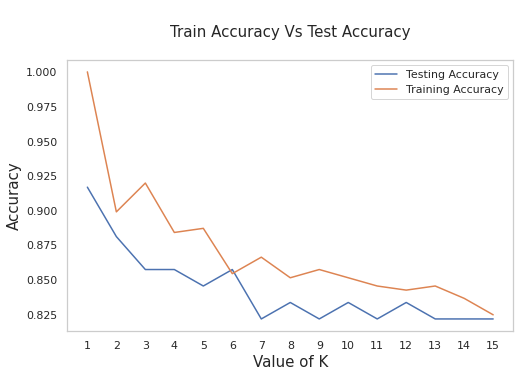

In [51]:
#Accuracy Plot
plt.figure(figsize=[8,5])
plt.plot(range(1,16), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,16), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('\nTrain Accuracy Vs Test Accuracy\n',fontsize=15)
plt.xlabel('Value of K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xticks(range(1,16))
plt.grid()
plt.show()

In [52]:
# Tuning Parameters using Grid search cross validation 
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": list(range(1,16,1)), 'metric': ['euclidean','manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]})

In [53]:
#KNN best estimator
knn_besthypr = grid_knn.best_estimator_
knn_besthypr

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [54]:
#Print hyperparameter
print("Tuned hyperparameter: {}".format(grid_knn.best_params_)) 
print("Best score: {}".format(grid_knn.best_score_))

Tuned hyperparameter: {'metric': 'euclidean', 'n_neighbors': 1}
Best score: 0.8601404741000879


In [55]:
#Using best hyperparameter

knn = knn_besthypr.fit(x_train,y_train)
y_pred1 = knn.predict(x_test)
acc = accuracy_score(y_pred1,y_test)
print('The accuracy of the KNN with K = {} is {}%'.format(knn_besthypr.n_neighbors,round(acc*100,2)))

The accuracy of the KNN with K = 1 is 91.67%


Confusion matrix after KNN:- 


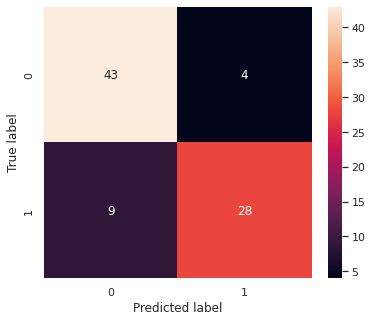

In [56]:
print("Confusion matrix after KNN:- ")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Section V : Training with Naive Bayes

- Now , fit a Naive Bayes Classifier to the same data. 
- Train a NB model with default arguments and make a note of training and test metrics
- What are your inferences on the relative performance between the KNN and NB based models? 
- Which of these models would you recommend and with what reasons ?

In [57]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        47
           1       0.97      0.84      0.90        37

    accuracy                           0.92        84
   macro avg       0.93      0.91      0.91        84
weighted avg       0.92      0.92      0.92        84



In [58]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)

GaussianNB()

In [59]:
#Predicting the Test set results
y_pred = nvclassifier.predict(x_test)
print(y_pred)

[0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0
 1 1 1 0 1 0 0 1 0 1]


In [60]:
accuracy_score(y_pred,y_test)

0.8452380952380952

Confusion matrix after Naive Bayes:- 


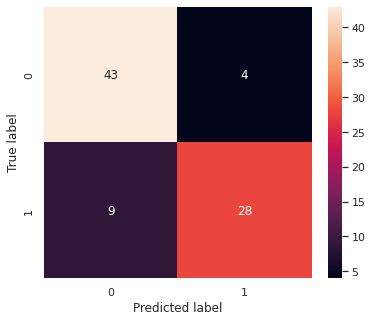

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion matrix after Naive Bayes:- ")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        47
           1       0.88      0.76      0.81        37

    accuracy                           0.85        84
   macro avg       0.85      0.84      0.84        84
weighted avg       0.85      0.85      0.84        84



In [62]:
# Accuracy for KNN was either similar to or greater than Naive Bayes 
# But a closer look at the classification report gives us a better idea 
# Naive Bayes has f1 score of 81 for classifying abnormal cases correctly and KNN has a score of 0.90 for the same.
